In [1]:
from TradingEnvironment import StockTrading as Env
import DDPG_Algo as ddpg
import pandas as pd

In [2]:
window=5
frame_bound=(6,1500)

In [3]:
df = pd.read_csv('data/NIFTY50.csv')
my_env = Env(df,5,(6,120))

Total Return: -60.95 % 			Total Reward: -101.91522462198375


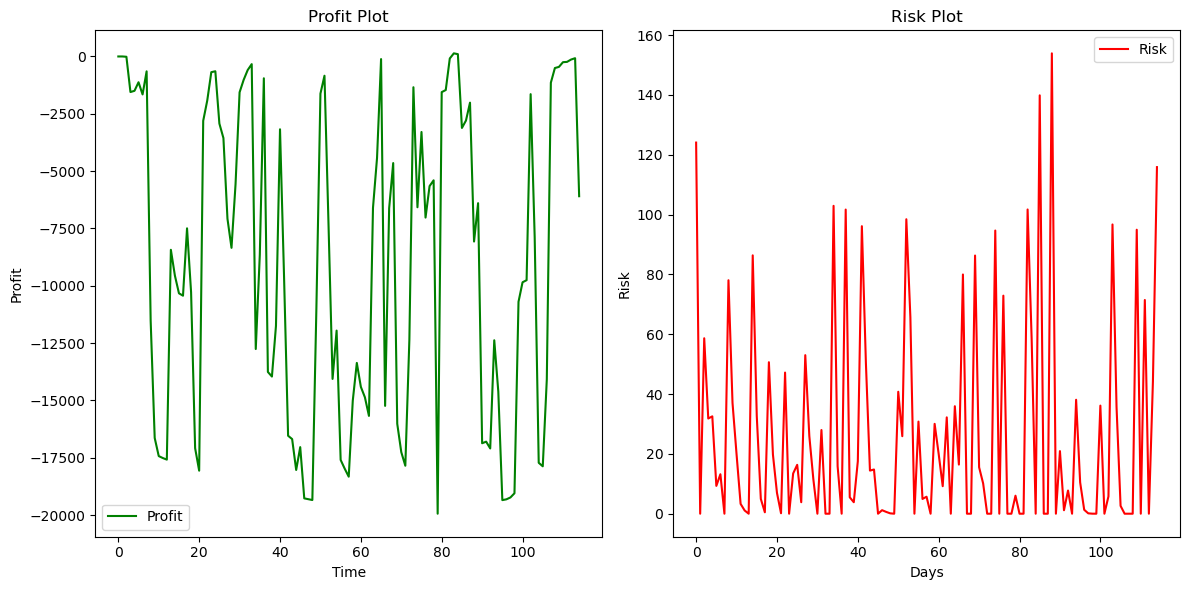

In [4]:
obs,_=my_env.reset(10000,0,0)
done=0
total_reward=0
while not done:
    action=my_env.random_action()
    obs,reward,done,info=my_env.step(action)
    total_reward+=reward
    if done:
        print(f"Total Return: {my_env.percentageReturn()} %",f"\t\t\tTotal Reward: {total_reward}")
        my_env.render()

In [5]:
# Initialize environment and agent
env = Env(df, window, frame_bound)
state_dim = 40  # This is the size of your flattened state
action_dim = 2  # This is the size of your action space

actor = ddpg.Actor(state_dim, action_dim)
critic = ddpg.Critic(state_dim , action_dim)
agent = ddpg.DDPGAgent(env, actor, critic, actor_lr=9e-4, critic_lr=1e-3, gamma=0.99, tau=1e-2, buffer_maxlen=100000)

# Parameters
num_episodes = 100  # How many episodes of interaction to generate
max_steps = 2000  # How many steps of interaction (max) to generate for each episode
batch_size = 100  # How many experiences to use for each update of the networks
max_reward = None
# Start training loop
for i_episode in range(1, num_episodes+1):
    state,_ = env.reset(100000, 0, 0)
    episode_reward = 0

    for t in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.replay_buffer.push(state, action, reward, next_state, done)
        if len(agent.replay_buffer) > batch_size:
            agent.update(batch_size)

        state = next_state
        episode_reward += reward

        if done or t == max_steps-1:
            print("Episode %d, reward %f" % (i_episode, episode_reward))
            break
    agent.noise.reset()
    if max_reward is None or episode_reward > max_reward:
        print("Episode: {}, Reward: {}, New record!".format(i_episode, episode_reward))
        max_reward = episode_reward
        agent.save("best_model")


Episode 1, reward -199.420866
Episode: 1, Reward: -199.42086571974514, New record!
Episode 2, reward 0.000000
Episode: 2, Reward: 0.0, New record!
Episode 3, reward 0.000000
Episode 4, reward 0.000000
Episode 5, reward 0.000000
Episode 6, reward 0.000000
Episode 7, reward 0.000000
Episode 8, reward 0.000000
Episode 9, reward 3.219479
Episode: 9, Reward: 3.2194790881513473, New record!
Episode 10, reward 0.000000
Episode 11, reward 0.000000
Episode 12, reward 0.000000
Episode 13, reward 0.000000
Episode 14, reward 0.000000
Episode 15, reward 0.000000
Episode 16, reward 0.000000
Episode 17, reward 0.000000
Episode 18, reward 0.000000
Episode 19, reward 0.000000
Episode 20, reward 0.000000
Episode 21, reward 0.000000
Episode 22, reward 0.000000
Episode 23, reward 0.000000
Episode 24, reward 0.000000
Episode 25, reward 0.000000
Episode 26, reward 0.000000
Episode 27, reward 0.000000
Episode 28, reward 0.000000
Episode 29, reward 0.000000
Episode 30, reward 0.000000
Episode 31, reward 0.000

KeyboardInterrupt: 

In [6]:
frame_bound=(1000,1500)

env = Env(df, window, frame_bound)

# Create a DDPG agent
agent = ddpg.DDPGAgent(env, actor, critic, actor_lr=1e-4, critic_lr=1e-3, gamma=0.99, tau=1e-2, buffer_maxlen=100000,sigma=0)

# Load the models
agent.load("best_model")  # replace "model" with your actual filename prefix


In [7]:
# Reset the environment to get the initial state
state, info = env.reset(cash=100000, long=0, short=0)  # replace these parameters with your own initial conditions

done = False
while not done:
    # Reshape state to 2D array
    state = state.reshape(1,-1)

    # Get an action from the DDPG agent (we don't need the epsilon for the exploration when using the model for prediction)
    action = agent.get_action(state)

    # Take a step in the environment with the action
    next_state, reward, done, info = env.step(action)

    # Set the current state to the next state
    state = next_state
    if done:
        print(f"The current net value: {env.curr_net_val}")



The current net value: 100000.0


In [ ]:
    env.render()
    env.initial_net_val